In [1]:
import pyodbc
import pandas as pd

In [2]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-DC2C3UH;'
                      'Database=CustomerSalesDWH;'
                      'Trusted_Connection=yes;')
cursor = conn.cursor()

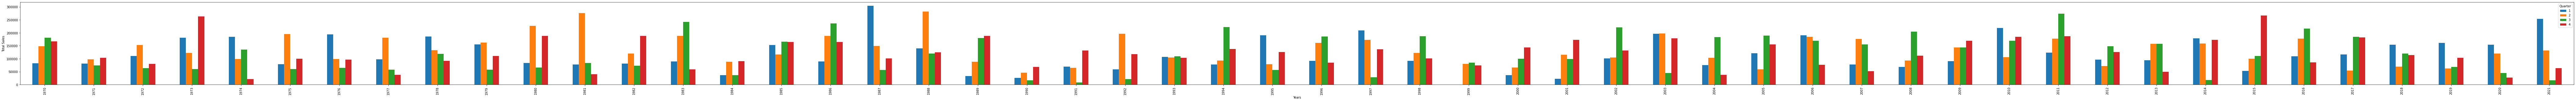

In [16]:
# roll-up on total sales by year and by quarter
sql_year_quarter = """select sum(F.dollars_sold) as totalSales, T.year, T.quarter from salesFactTable F, time T 
where F.time_key = T.time_key group by T.year, T.quarter order by quarter, year;""" 
cursor.execute(sql_year_quarter)
result_set = cursor.fetchall()

labels = set()
l = []
for row in result_set:
    l.append(list(row))

df = pd.DataFrame(l, columns=['Total Sales', 'Year', 'Quarter'])
df = df.pivot(index="Year", columns='Quarter', values='Total Sales')
df = df.astype(float)
ax = df.plot(kind="bar", figsize=(150, 5))
ax.set_xlabel("Years")
ax.set_ylabel("Total Sales")
figure = ax.get_figure()
figure.savefig('01.png')

In [27]:
# roll-up on total sales by country, by state, and by city
sql_country_state_city = """select sum(F.dollars_sold) as totalSales, L.country, L.city from salesFactTable F, location L
where F.location_key = L.location_key group by L.country, L.city order by country, city;"""
cursor.execute(sql_country_state_city)
result_set = cursor.fetchall()

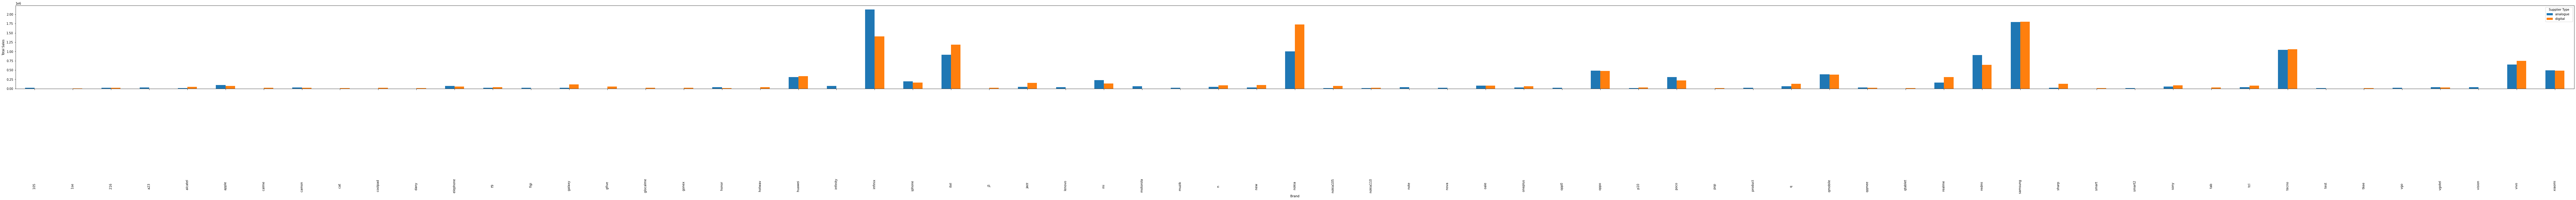

In [29]:
# roll-up on total sales by item brand and by item type (digital or analog)
sql_item_type_brand = """select sum(F.dollars_sold) as totalSales, I.brand, I.supplier_type from salesFactTable F, item I
where F.item_key = I.item_key group by I.brand, I.supplier_type;"""
cursor.execute(sql_item_type_brand)
result_set = cursor.fetchall()

l = []
for row in result_set:
    l.append(list(row))

df = pd.DataFrame(l, columns=['Total Sales', 'Brand', 'Supplier Type'])
df = df.pivot(index="Brand", columns='Supplier Type', values='Total Sales')
df = df.astype(float)
ax = df.plot(kind="bar", figsize=(150, 5))
ax.set_xlabel("Brand")
ax.set_ylabel("Total Sales")
figure = ax.get_figure()
figure.savefig('03.png')

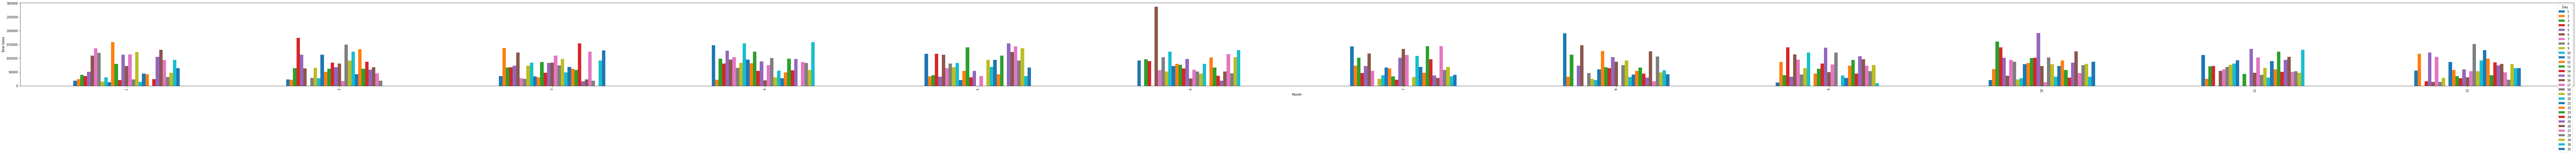

In [28]:
# drill-down on total sales by month and by day

sql_mont0h_day = """select sum(F.dollars_sold) as totalSales, T.month, T.day from salesFactTable F, time T 
where F.time_key = T.time_key group by T.month, T.day order by month, day;"""
cursor.execute(sql_mont0h_day)
result_set = cursor.fetchall()

l = []
for row in result_set:
    l.append(list(row))

df = pd.DataFrame(l, columns=['Total Sales', 'Month', 'Day'])
df = df.pivot(index="Month", columns='Day', values='Total Sales')
df = df.astype(float)
ax = df.plot(kind="bar", figsize=(150, 5))
ax.set_xlabel("Month")
ax.set_ylabel("Total Sales")
figure = ax.get_figure()
figure.savefig('04.png')

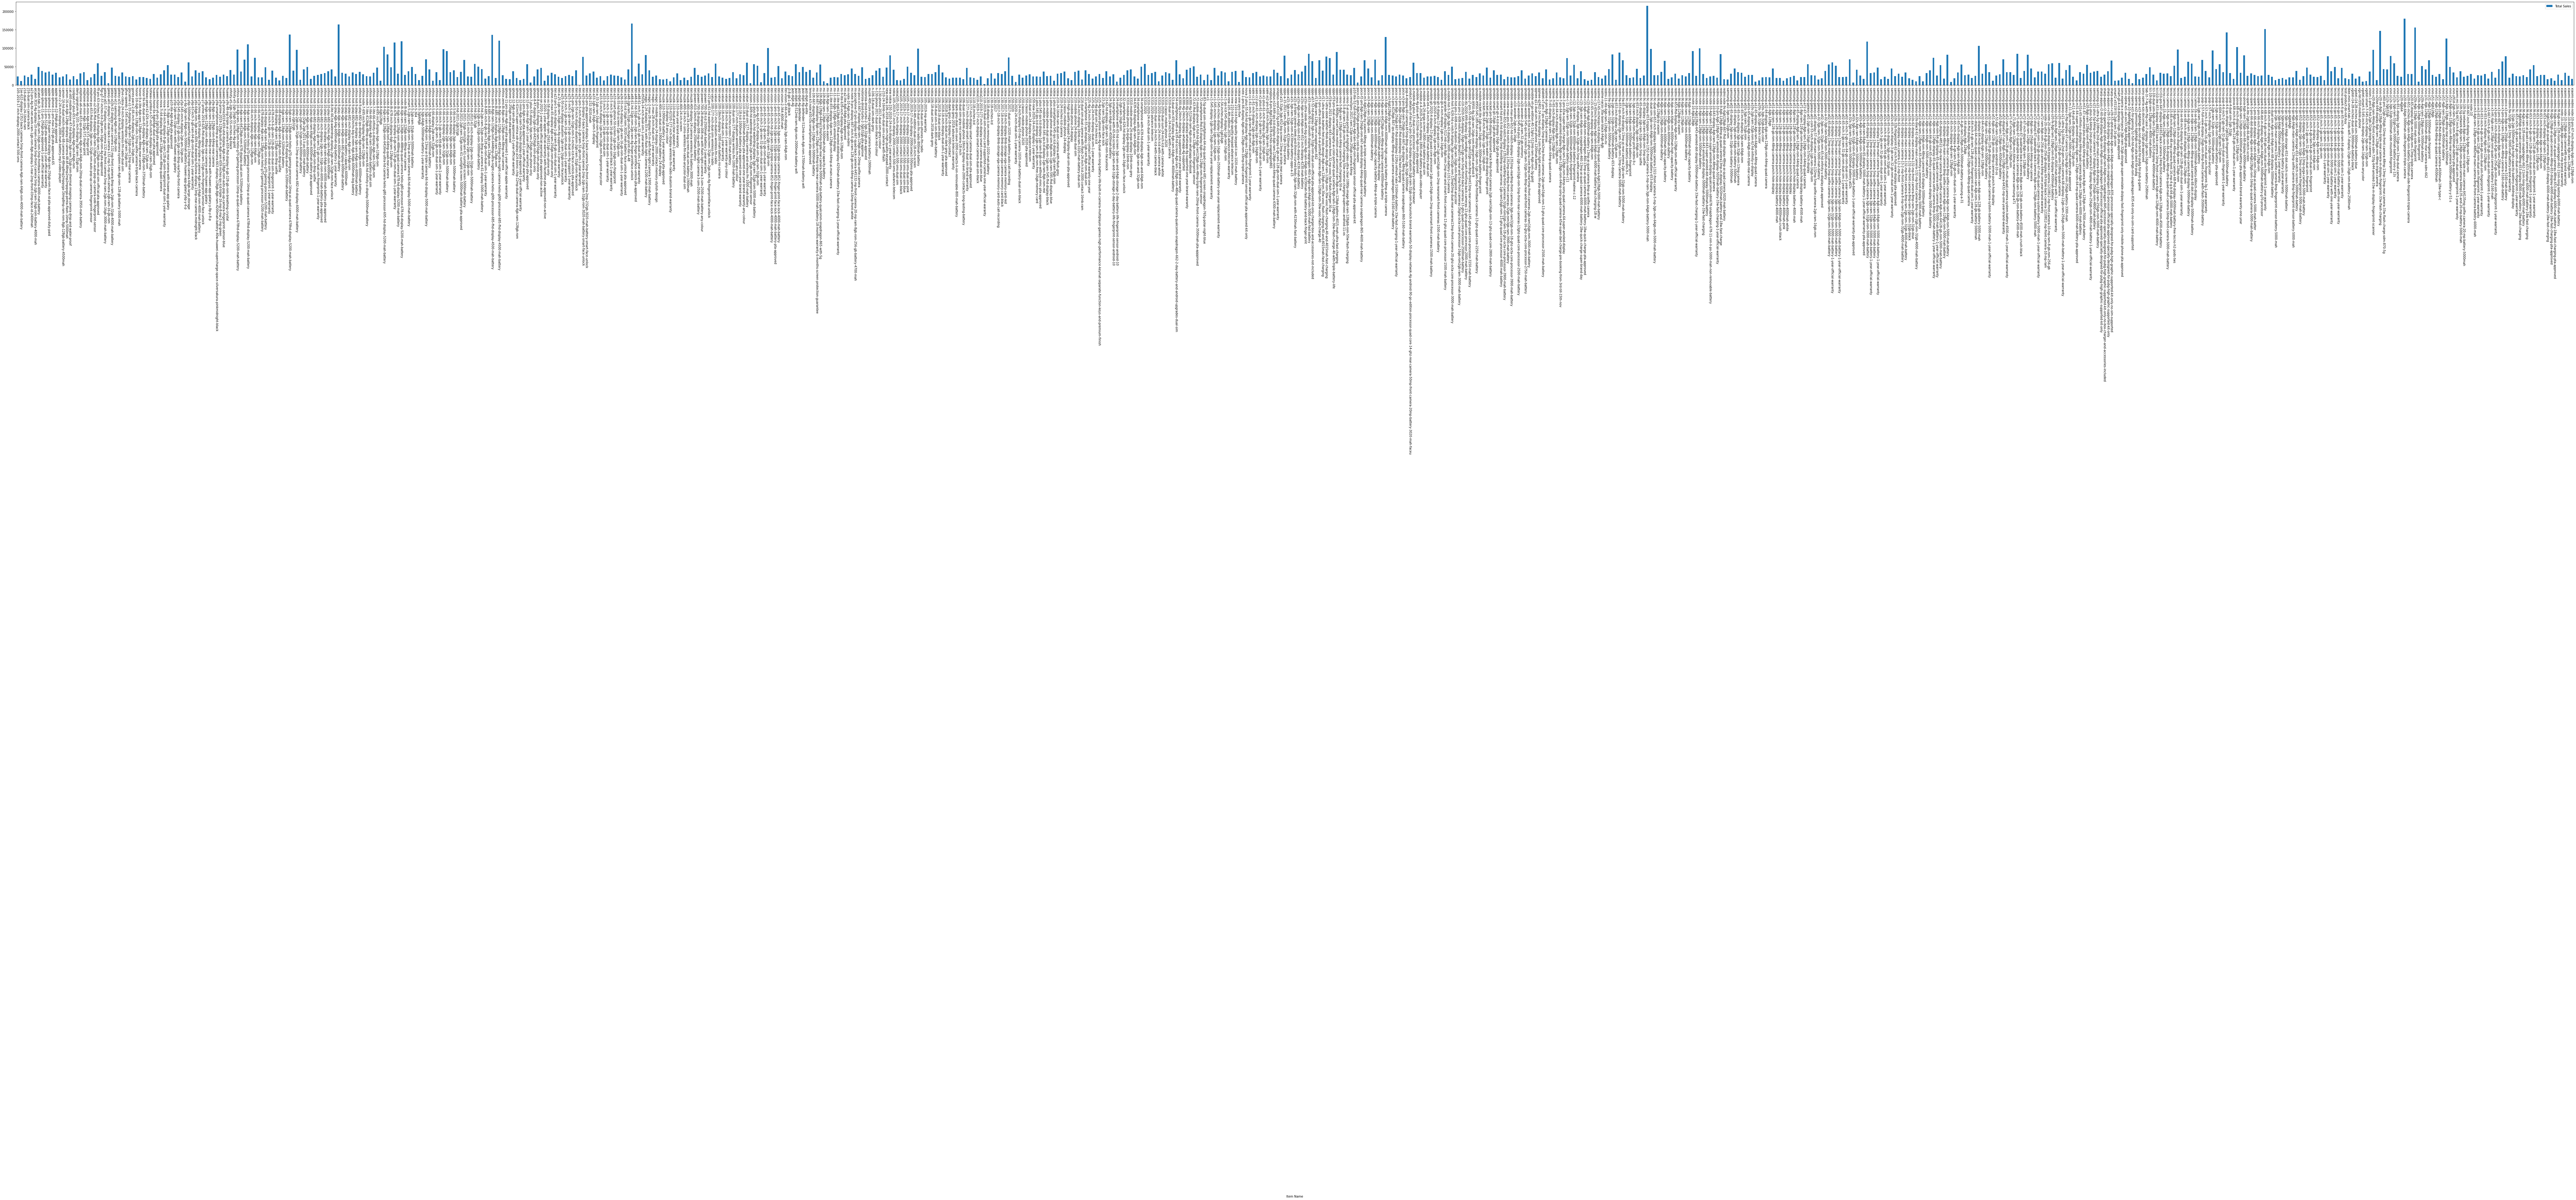

In [5]:
# drill down on total sales by item name
sql_item_name = """select sum(F.dollars_sold) as totalSales, I.item_name from salesFactTable F, item I
where F.item_key = I.item_key group by I.item_name"""
cursor.execute(sql_item_name)
result_set = cursor.fetchall()

total_sales = []
item_name = []
for i in range(0, len(result_set)):
    total_sales.append(float(result_set[i][0]))
    item_name.append(str(result_set[i][1]))

df = pd.DataFrame({'Total Sales': total_sales, 'Item Name': item_name})
ax = df.plot.bar(x='Item Name', y='Total Sales', rot=-90, figsize=(150, 5))
figure = ax.get_figure()
figure.savefig('05.png')

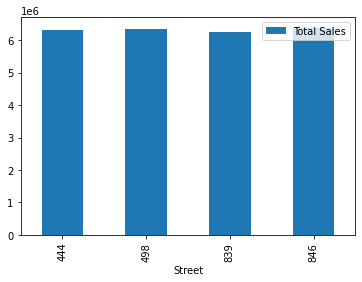

In [4]:
# drill down on total sales by street address
sql_street_address = """select sum(F.dollars_sold) as totalsales, D.street from salesFactTable F, location D 
where D.location_key = F.location_key group by D.street"""
cursor.execute(sql_street_address)
result_set = cursor.fetchall()

total_sales = []
street = []
for i in range(0, len(result_set)):
    total_sales.append(float(result_set[i][0]))
    street.append(str(result_set[i][1]))

df = pd.DataFrame({'Total Sales': total_sales, 'Street': street})
ax = df.plot.bar(x='Street', y='Total Sales')
figure = ax.get_figure()
figure.savefig('06.png')